# Lending Club: Random Forest.

This project is aimed to create a Random Forest model for predicting the borrowers who has the maximum repaying probability. Lending Club connects borrowers with investors. In this project we will be exploring publicly available data from https://www.lendingclub.com/. For this project ee will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


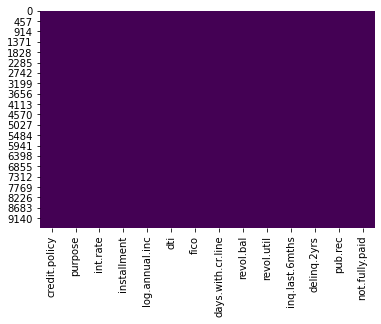

In [8]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

**No missing data**

# EDA

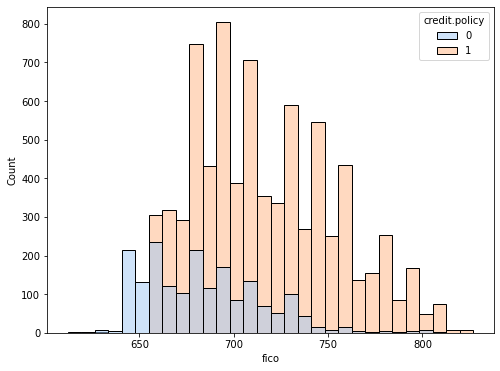

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='fico', hue="credit.policy", bins = 30, palette = 'pastel')

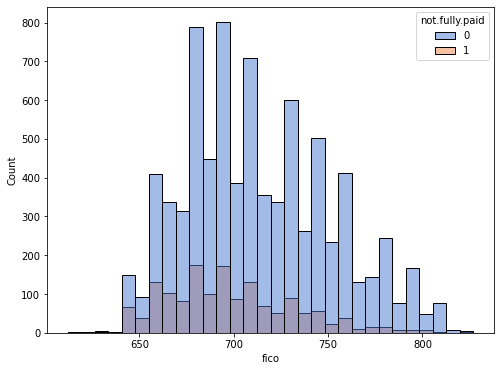

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='fico', hue="not.fully.paid", bins = 30, palette='muted')

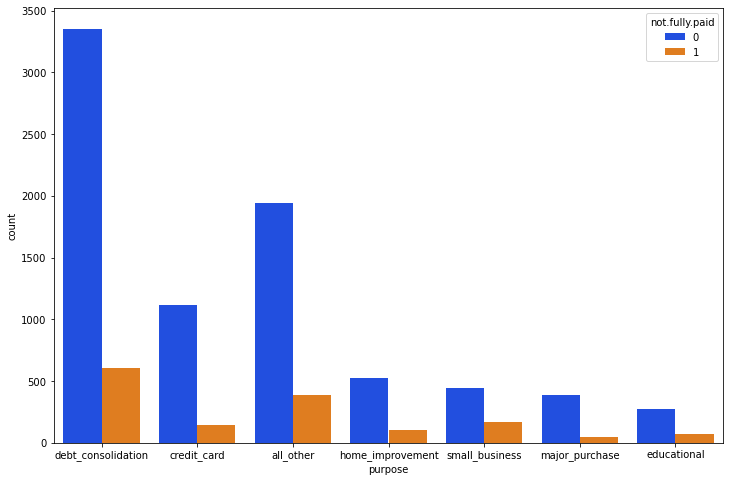

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data =df, x = 'purpose', hue = 'not.fully.paid', palette ='bright')

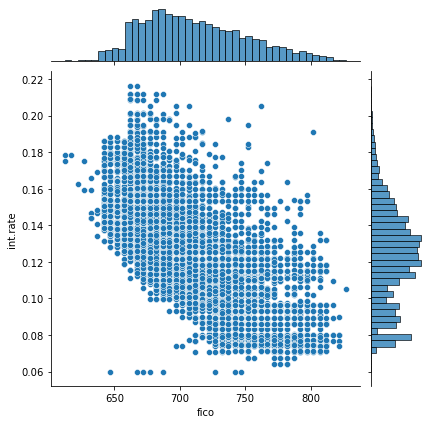

In [12]:
sns.jointplot(x ='fico', y ='int.rate', data=df, palette='RdPu')

<Figure size 720x576 with 0 Axes>

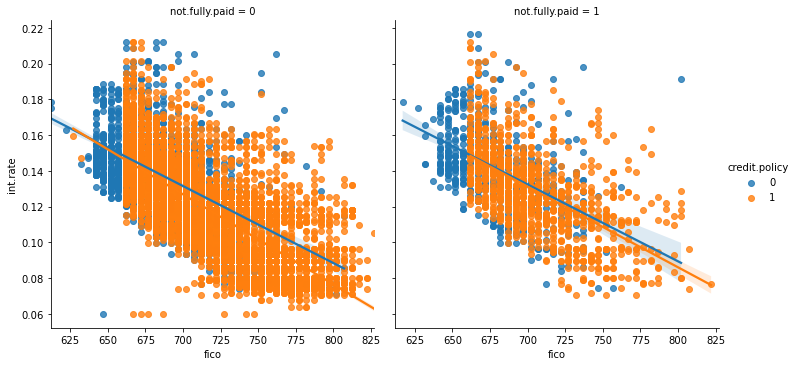

In [13]:
plt.figure(figsize =(10,8), frameon=False)
sns.lmplot(x='fico', y='int.rate', hue="credit.policy", col="not.fully.paid", data= df)

# Dummy variable

In [16]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

As we can see that the 'purpose' column is a categorical variable with 7 different categories. The model will not identify a text value. So we need to convert this into a descrete numerical values using pd.get_dummies fuction.

In [66]:
purpose_list = ['purpose']      # purpose_list assigned as purpose colum values list.
df_clean = pd.get_dummies(df, columns= purpose_list , drop_first=True)
df_clean

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


# Train_Test_Split

In [46]:
X = df_clean.drop('not.fully.paid', axis = 1)
y = df_clean['not.fully.paid']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(f'**Confusion Matrix: \n  {confusion_matrix(y_test, dtc_predict)}')
print('\n')
print(f'**Classificattion Report: \n {classification_report(y_test, dtc_predict)}')

**Confusion Matrix: 
  [[1993  438]
 [ 339  104]]


**Classificattion Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



# Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 300)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
print(f'**Confusion Matrix: \n {confusion_matrix(y_test, rfc_predict)}')
print('\n')
print(f'**Classificattion Report: \n {classification_report(y_test, rfc_predict)}')

**Confusion Matrix: 
 [[2425    6]
 [ 436    7]]


**Classificattion Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.54      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.47      2874
weighted avg       0.80      0.85      0.78      2874



**Hence the accuracy increased by using Random Forest method** But when we observe the class 1 on the Decision Tree the f1-score is much higher than f1-score in Random Forest. So it depends upon which class we are more concerned about.